# Laboratorio 3
## Alexander Espinosa Montoya

### 2. Analisis de pulsos de radar
1. Genere un pulso rectangular de 25 muestras. Tip: Utilice la funcion de numpy np.ones(25).

In [2]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la señal
import matplotlib.pyplot as plt # Libreria para graficar
import numpy as np

rect_pulse = np.ones((25,), dtype=int); #rect_pulse es el vector con el pulso rectangular
print("Vector de Pulso: ", rect_pulse);


Vector de Pulso:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


2. Calcule y grafique la funcion de autocorrelacion del pulso generado.

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/990848695.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo


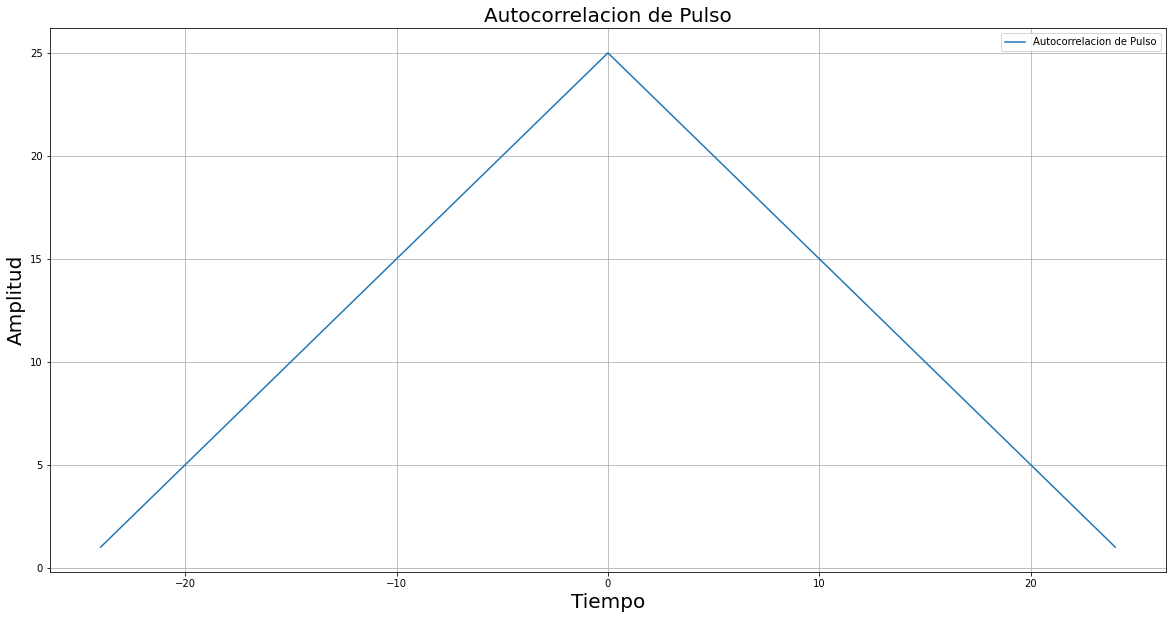

Rxx 49
Tau 49


In [13]:
Rxx = np.correlate(rect_pulse, rect_pulse, mode='full')
tau = np.arange(-len(rect_pulse)+1,len(rect_pulse),1)  #vector de retraso

plt.figure(figsize=(20,10))  #tamaño de la grafica
plt.plot(tau,Rxx, label="Autocorrelacion de Pulso")  #señal x y  t
plt.xlabel('Tiempo',fontsize=20) #label x
plt.ylabel('Amplitud',fontsize= 20) #label y
plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

print("Rxx",len(Rxx))
print("Tau",len(tau))

¿Que puede concluir de la grafica obtenida?
R: Podemos ver una auto correlacion perfecta de la señal pulso, al integrar los pulsos se trasforman en rampas y el punto maximo nos dira el atraso entre estas señales, en este caso no tenemos atrazo alguno

3. Utilice la funcion delay noise incluida en la librerıa adjunta ’utils.py’ para simular el ruido introducido por el canal, y el desfase de la senal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el pulso y decir cuanto es su retraso?

Delayed_pulse 95
tr 95


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/922548476.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo


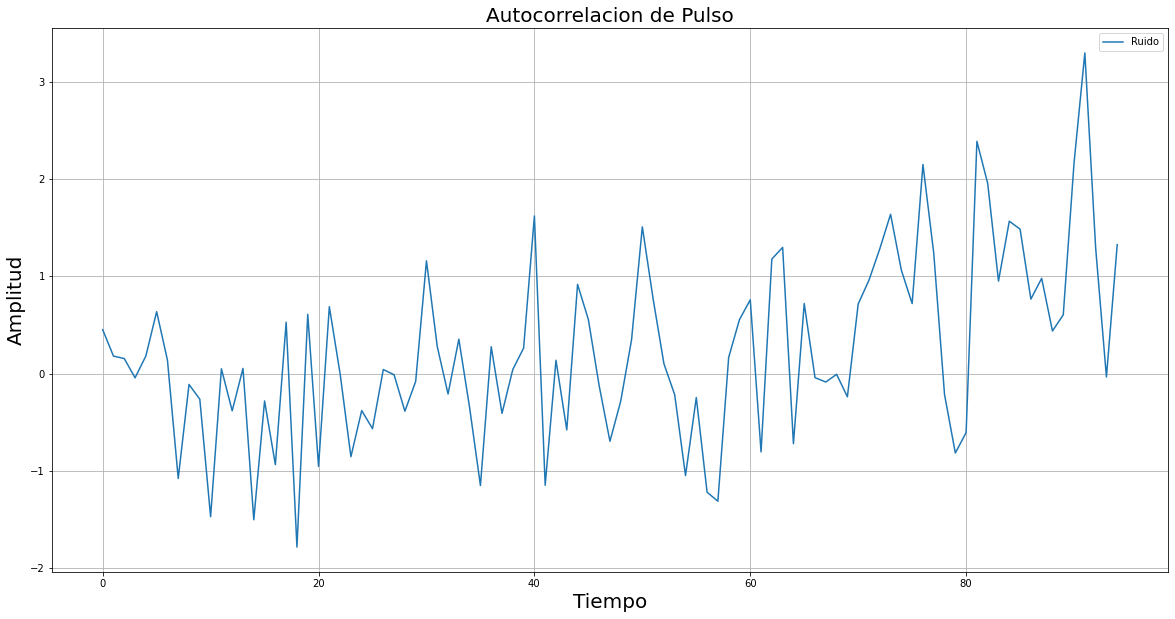

In [23]:
from utils import delay_noise
delayed_pulse = delay_noise(rect_pulse);
tr = np.arange(0,len(delayed_pulse),1)  #vector de retraso

print("Delayed_pulse",len(delayed_pulse))
print("tr",len(tr))

plt.figure(figsize=(20,10))  #tamaño de la grafica
plt.plot(delayed_pulse, label="Ruido")  #señal x y  t
plt.xlabel('Tiempo',fontsize=20) #label x
plt.ylabel('Amplitud',fontsize= 20) #label y
plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


¿Es capaz de distinguir el pulso y decir cuanto es su retraso?
R: no, en este caso no es posible distinguir el pulso en esta señal, y para su retraso necesito otra señal para comparar

4. Utilice la funcion de numpy np.correlate para hallar la correlacion entre la senal distorsionada y la senal original. Muestre el resultado graficamente.

Restraso:  70
# Datos correlacion 71


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/3676085764.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo


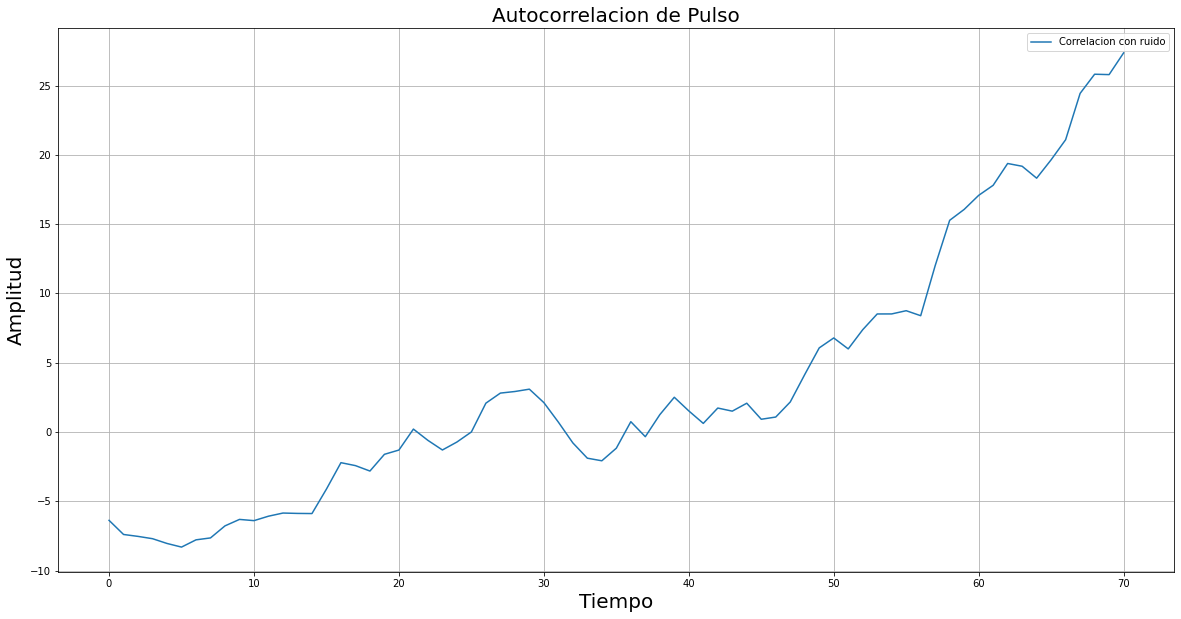

In [26]:
xcorr=np.correlate(delayed_pulse,rect_pulse);
delay = np.argmax(xcorr);
tau = np.arange(-len(rect_pulse)+1,len(delayed_pulse),1);  #vector de retraso

print("Restraso: ",delay)
print("# Datos correlacion",len(xcorr))
plt.figure(figsize=(20,10))  #tamaño de la grafica
plt.plot(xcorr, label="Correlacion con ruido")  #señal x y  t
plt.xlabel('Tiempo',fontsize=20) #label x
plt.ylabel('Amplitud',fontsize= 20) #label y
plt.title("Autocorrelacion de Pulso",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


¿Cual es el retraso? ¿Que se puede concluir?
R: el restraso es de 70, ya que el pico de la señal se encuentra en este punto, puedo ver la influencia de el ruido y el retraso en esta señal

# 3. Analisis de Electroencefalograma (EEG)

Cargue el archivo eeg.npy con numpy.load , para cada canal normalice en amplitud y elimine el nivel DC.
Luego escoja el canal de acuerdo al ultimo numero de su cedula a partir de la siguiente lista: (1.Canal 21)
Finalmente grafique el canal elegido con y sin normalizacion usando subplot para una f´acil comparacion.

25
[-24.90234375 -26.3671875  -24.26757812 ... -15.47851562 -10.9375
  -7.2265625 ]


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/760240340.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Canal 21",FontSize=20) #titulo


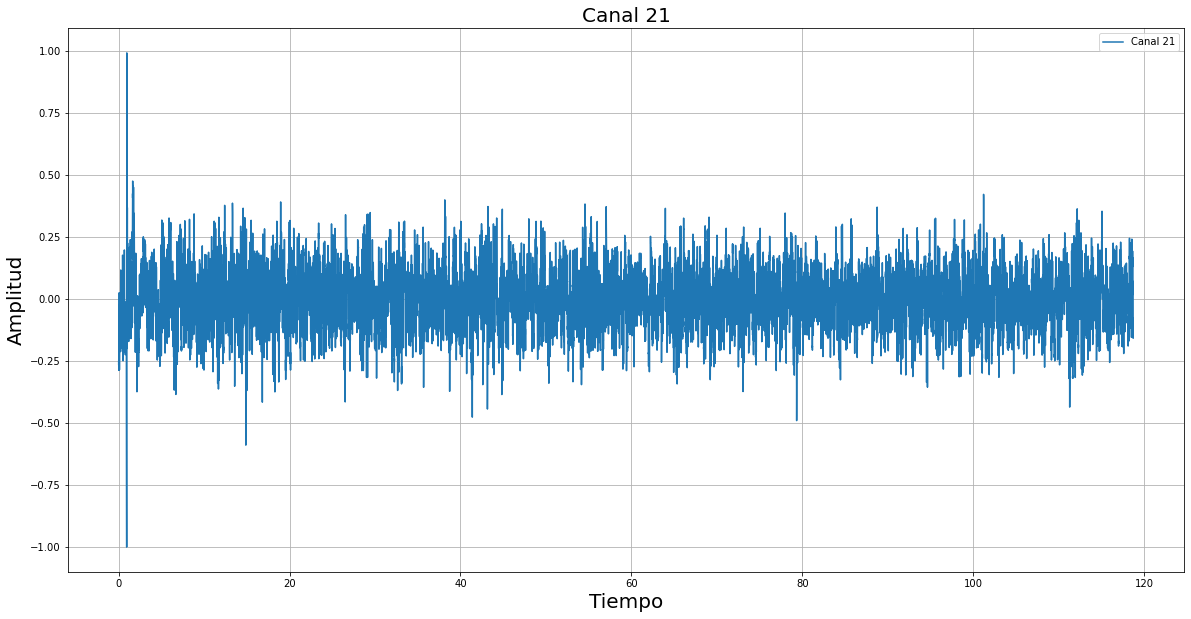

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/760240340.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Sin normalizar",FontSize=20) #titulo
C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/760240340.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Normalizado",FontSize=20) #titulo


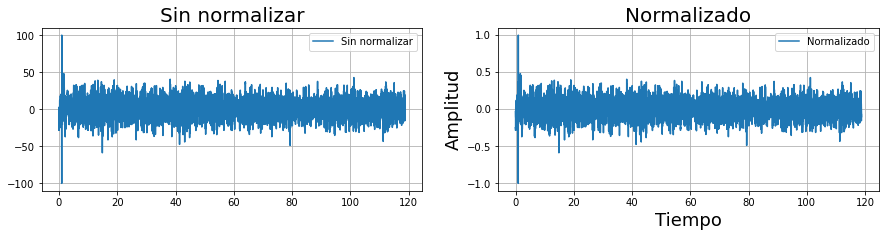

In [50]:
data = np.load("eeg.npy");
cana_21_noN = data[20];
canal_21 = data[20];
canal_21 = canal_21 - np.mean(canal_21) # Quitar el valor DC de la señal
canal_21 = canal_21/float(np.max(np.abs(canal_21))) # centramos en -1 y 1 
fs = 250;
t = np.arange(0, len(canal_21)/fs, 1.0/fs)
print(len(data))
print(data[20])

plt.figure(figsize=(20,10))  #tamaño de la grafica
plt.plot(t,canal_21, label="Canal 21")  #señal x y  t
plt.xlabel('Tiempo',fontsize=20) #label x
plt.ylabel('Amplitud',fontsize= 20) #label y
plt.title("Canal 21",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(t,cana_21_noN, label="Sin normalizar")
plt.title("Sin normalizar",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(t,canal_21, label="Normalizado")
plt.title("Normalizado",FontSize=20) #titulo
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.legend()
plt.grid()
plt.show()

¿Que observa? Describa brevemente la diferencia entre las graficas
R: podemos ver la perdida de el nivel dc y su normalizacion

## 3.1 Coeficiente de correlacion entre canales
1. Ahora calcule el coeficiente de correlacion entre el canal que le corresponde y los otros canales. Finalmente, grafique estos coeficientes de correlacion (deben ser 25) utilizando la funcion plt.stem.
    Tip: Use la funci´on np.corrcoef para calcular los coeficientes.

25
[0.6088596108252872, 0.6652365610378608, 0.6958070575654636, 0.6964935926352039, 0.730704713547498, 0.7222576079351475, 0.6662937067389672, 0.7590690945386752, 0.7932650039383944, 0.8074993048319719, 0.8341478805078524, 0.8419712323227361, 0.7700529129967403, 0.8133789836141874, 0.8740959779133343, 0.9053007965255895, 0.9370006635461658, 0.933138796094418, 0.9025860989674778, 0.970483758972884, 1.0, 0.9016536681229999, 0.06155426568065311, 0.23578518200060897, 0.17510168563064968]


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/2777549176.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Coeficientes con el canal",FontSize=20) #titulo


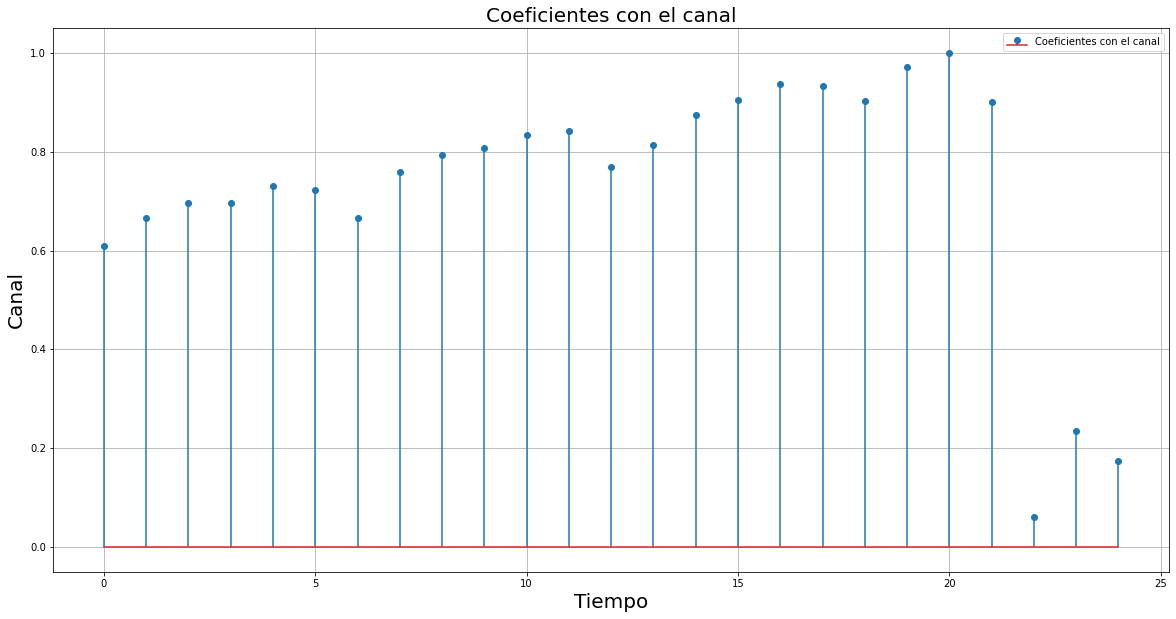

In [64]:
coeficientes = [];
for i in data:
    i = i - np.mean(i) # Quitar el valor DC de la señal
    i = i/float(np.max(np.abs(i))) # centramos en -1 y 1 
    coef = np.corrcoef(canal_21,i)
    coeficientes.append(coef[0,1]);
print(len(coeficientes))
print(coeficientes)

t = np.arange(0, len(data),1)
plt.figure(figsize=(20,10))  #tamaño de la grafica
plt.stem(t,coeficientes, label="Coeficientes con el canal")  #señal x y  t
plt.xlabel('Tiempo',fontsize=20) #label x
plt.ylabel('Canal',fontsize= 20) #label y
plt.title("Coeficientes con el canal",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


¿Que observa? Describa brevemente la diferencia entre las graficas
R: entre mas cerca de 1 el coeficiente, las señales tendran un grado relacion, en este caso por su posicion en el cuerpo, lo vemos en los canales filaes que se encuentran al lado contrario de canal 21 que es el de referencia.

## 3.2. Funcion de autocorrelacion de un canal

1. Calcule la funcion de autocorrelacion del canal que le corresponde, luego calcule la funcion de correlacion entre la senal correspondiente, y uno de los canales de los ojos (canal 22 o 24), finalmente grafique y compare las dos funciones utilizando subplots. Sugerencia: Haga zoom sobre las senales para observar mejor las diferencias.

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/376572574.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Auto Correlacion canal 21",FontSize=20) #titulo
C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17172/376572574.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Correlacion canal 21 y canal 24",FontSize=20) #titulo


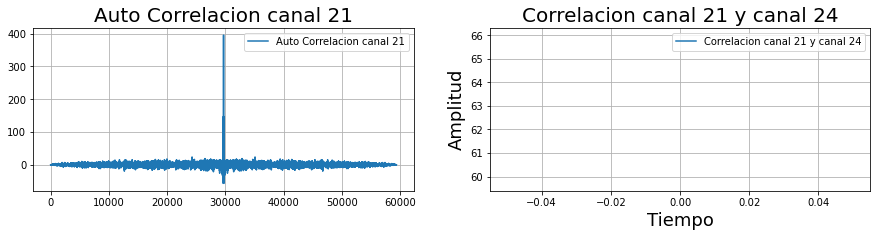

In [71]:
Rxx = np.correlate(canal_21, canal_21, mode='full')

canal_24 = data[23];
canal_24 = canal_24 - np.mean(canal_24) # Quitar el valor DC de la señal
canal_24 = canal_24/float(np.max(np.abs(canal_24))) # centramos en -1 y 1 

xcorr=np.correlate(canal_21,canal_24);
t = np.arange(-len(canal_21)+1,len(canal_21),1)  #vector de retraso

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(Rxx, label="Auto Correlacion canal 21")
plt.title("Auto Correlacion canal 21",FontSize=20) #titulo
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(xcorr, label="Correlacion canal 21 y canal 24")
plt.title("Correlacion canal 21 y canal 24",FontSize=20) #titulo
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize= 18)
plt.legend()
plt.grid()
plt.show()

¿Que observa?. Describa brevemente las graficas obtenidas
R: podemos ver que las señales al estar en una ubicacion contraria en el cuerpo, la relacion entre estas señales no es posible de aprecias, prox a o

# 4. Conclusiones
*   Se comprende la utilidad de utilizar la correlación entre dos variables, la cual me permite encontrar relaciones lineales o no de dos variables.
*   Se aprende a utilizar las librerías de Python con el fin de simplificar los procesos matemáticos relacionados a la corrección (procedimiento, gráfica y valor).
*   Se aprende el significado del coeficiente de Pearson, y como que utilidad tiene en el análisis de relación a variables.